**Part 1: Data Preprocessin**

In this part we work we covid dataset

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 8)

In [26]:
columns = ['id', 'sex', 'birth_year', 'country', 'region', 'infection_reason',
           'infected_by', 'confirmed_date', 'state']

covid = pd.read_csv('data/covid.csv', ',')
covid_copy = pd.read_csv('data/covid.csv', ',')
covid

,id,sex,birth_year,country,region,infection_reason,infected_by,confirmed_date,state
0,1,female,1984.0,China,filtered at airport,visit to Wuhan,NaN,1/20/2020,released
1,2,male,1964.0,Korea,filtered at airport,visit to Wuhan,NaN,1/24/2020,released
2,3,male,1966.0,Korea,capital area,visit to Wuhan,NaN,1/26/2020,released
3,4,male,1964.0,Korea,capital area,visit to Wuhan,NaN,1/27/2020,released
4,5,male,1987.0,Korea,capital area,visit to Wuhan,NaN,1/30/2020,released
5,6,male,1964.0,Korea,capital area,contact with patient,3.0,1/30/2020,released
6,7,male,1991.0,Korea,capital area,visit to Wuhan,NaN,1/30/2020,released
7,8,female,1957.0,Korea,Jeollabuk-do,visit to Wuhan,NaN,1/31/2020,released
8,9,female,1992.0,Korea,capital area,contact with patient,5.0,1/31/2020,released
9,10,female,1966.0,Korea,capital area,contact with patient,6.0,1/31/2020,released


In [27]:
birth_years = covid['birth_year']
min_birth_year = int(birth_years.min())
max_birth_year = int(birth_years.max())
mean_birth_year = int(birth_years.mean())
print('Max Birth Year: {}'.format(max_birth_year))
print('Min Birth Year: {}'.format(min_birth_year))
print('Mean Birth Year: {}'.format(mean_birth_year))

Max Birth Year: 2009
Min Birth Year: 1936
Mean Birth Year: 1973


In [28]:
def count_nans(df, columns):
    for col in columns:
        nans = df[col].isna().sum()
        print('Number of NaN values in column {:<20} is {}'.format('"'+col+'"', nans))

In [29]:
count_nans(covid_copy, columns)

covid['birth_year'].fillna(int(covid['birth_year'].mean()) * 1., inplace=True)
covid['region'].fillna('Unknown region', inplace=True)
covid['infection_reason'].fillna('Unknown reason', inplace=True)
covid['infected_by'].fillna(int(covid['infected_by'].mean()) * 1., inplace=True)

print('\nRemoved missing values\n')
count_nans(covid, columns)

Number of NaN values in column "id"                 is 0
Number of NaN values in column "sex"                is 0
Number of NaN values in column "birth_year"         is 10
Number of NaN values in column "country"            is 0
Number of NaN values in column "region"             is 10
Number of NaN values in column "infection_reason"   is 81
Number of NaN values in column "infected_by"        is 134
Number of NaN values in column "confirmed_date"     is 0
Number of NaN values in column "state"              is 0

Removed missing values

Number of NaN values in column "id"                 is 0
Number of NaN values in column "sex"                is 0
Number of NaN values in column "birth_year"         is 0
Number of NaN values in column "country"            is 0
Number of NaN values in column "region"             is 0
Number of NaN values in column "infection_reason"   is 0
Number of NaN values in column "infected_by"        is 0
Number of NaN values in column "confirmed_date"     is 0
N

In [30]:
year = covid['birth_year'].values
inf_by = covid['infected_by'].values

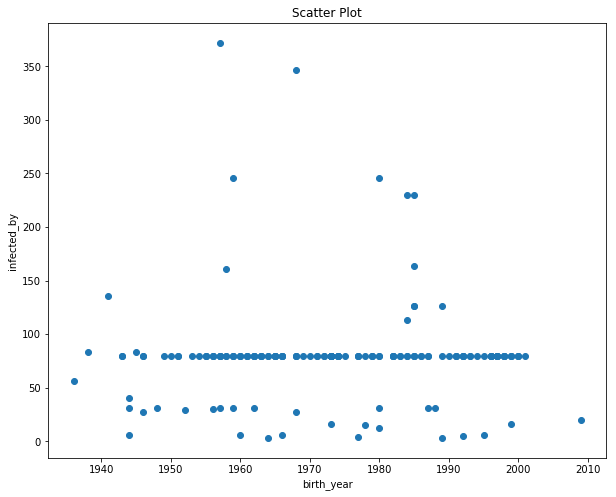

In [31]:
plt.xlabel('birth_year')
plt.ylabel('infected_by')
plt.title('Scatter Plot')
plt.scatter(year, inf_by)

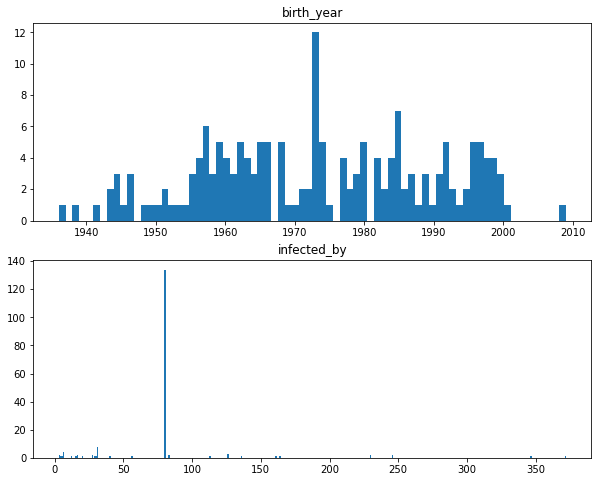

In [32]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.set_title('birth_year')
ax1.hist(year, 74)

ax2.set_title('infected_by')
ax2.hist(inf_by, 370)

fig.show()

**Part 2: Linear Regression**

In this part we work with student dataset

In [34]:
student = pd.read_csv('data/student.csv', ';')
student

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [105]:
train_split = 0.8
iters = 1000
alpha = 0.00001

In [106]:
important_cols = ['age', 'Medu', 'Fedu', 'famrel', 'freetime', 'goout',
                  'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
dataset = student[important_cols].values
num_data = dataset.shape[0]
num_train = int(num_data * train_split)

x_train = dataset[:num_train, :-1]
y_train = dataset[:num_train, -1]
x_test = dataset[num_train:, :-1]
y_test = dataset[num_train:, -1]

print('Train data shape: {}'.format(x_train.shape))
print('Train labels shape: {}'.format(y_train.shape))
print('Test data shape: {}'.format(x_test.shape))
print('Test labels shape: {}'.format(y_test.shape))

Train data shape: (316, 12)
Train labels shape: (316,)
Test data shape: (79, 12)
Test labels shape: (79,)


In [107]:
#TODO: Normalize data
#TODO: Regularization

In [108]:
class LinearRegression():
    def __init__(self, num_in):
        self.beta = np.random.randn(num_in + 1)

    def add_bias(self, x):
        bias = np.ones((x.shape[0], 1))
        x_new = np.concatenate((x, bias), axis=1)
        return x_new

    def forward(self, x, y):
        y_pred = x @ self.beta
        loss = np.mean((y-y_pred)**2)
        return y_pred, loss
    
    def step(self, x, y, alpha):
        dcost_dbeta = x.T @ x @ self.beta - x.T @ y
        self.beta = self.beta - alpha * dcost_dbeta

In [110]:
net = LinearRegression(x_train.shape[1])
x_train = net.add_bias(x_train)
for i in range(iters):
    _, loss = net.forward(x_train, y_train)
    print('Iteration {:<3}: Loss = {:.3f}'.format(i+1, loss))
    net.step(x_train, y_train, alpha)

 4.324
Iteration 287: Loss = 4.318
Iteration 288: Loss = 4.312
Iteration 289: Loss = 4.305
Iteration 290: Loss = 4.299
Iteration 291: Loss = 4.293
Iteration 292: Loss = 4.287
Iteration 293: Loss = 4.281
Iteration 294: Loss = 4.275
Iteration 295: Loss = 4.269
Iteration 296: Loss = 4.263
Iteration 297: Loss = 4.257
Iteration 298: Loss = 4.251
Iteration 299: Loss = 4.245
Iteration 300: Loss = 4.239
Iteration 301: Loss = 4.233
Iteration 302: Loss = 4.228
Iteration 303: Loss = 4.222
Iteration 304: Loss = 4.216
Iteration 305: Loss = 4.210
Iteration 306: Loss = 4.205
Iteration 307: Loss = 4.199
Iteration 308: Loss = 4.193
Iteration 309: Loss = 4.188
Iteration 310: Loss = 4.182
Iteration 311: Loss = 4.177
Iteration 312: Loss = 4.171
Iteration 313: Loss = 4.166
Iteration 314: Loss = 4.160
Iteration 315: Loss = 4.155
Iteration 316: Loss = 4.149
Iteration 317: Loss = 4.144
Iteration 318: Loss = 4.139
Iteration 319: Loss = 4.133
Iteration 320: Loss = 4.128
Iteration 321: Loss = 4.123
Iteration 322